In [64]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.patches import Polygon, FancyBboxPatch
from matplotlib.collections import PatchCollection

# Настройка для Retina дисплея (высокое разрешение)
%config InlineBackend.figure_format = 'retina'

# Настройки для красивых графиков
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 100


# Теорема Пифагора: Визуальное доказательство

Два способа разбить квадрат со стороной $(a+b)$ на одинаковые части показывают, что $a^2 + b^2 = c^2$.


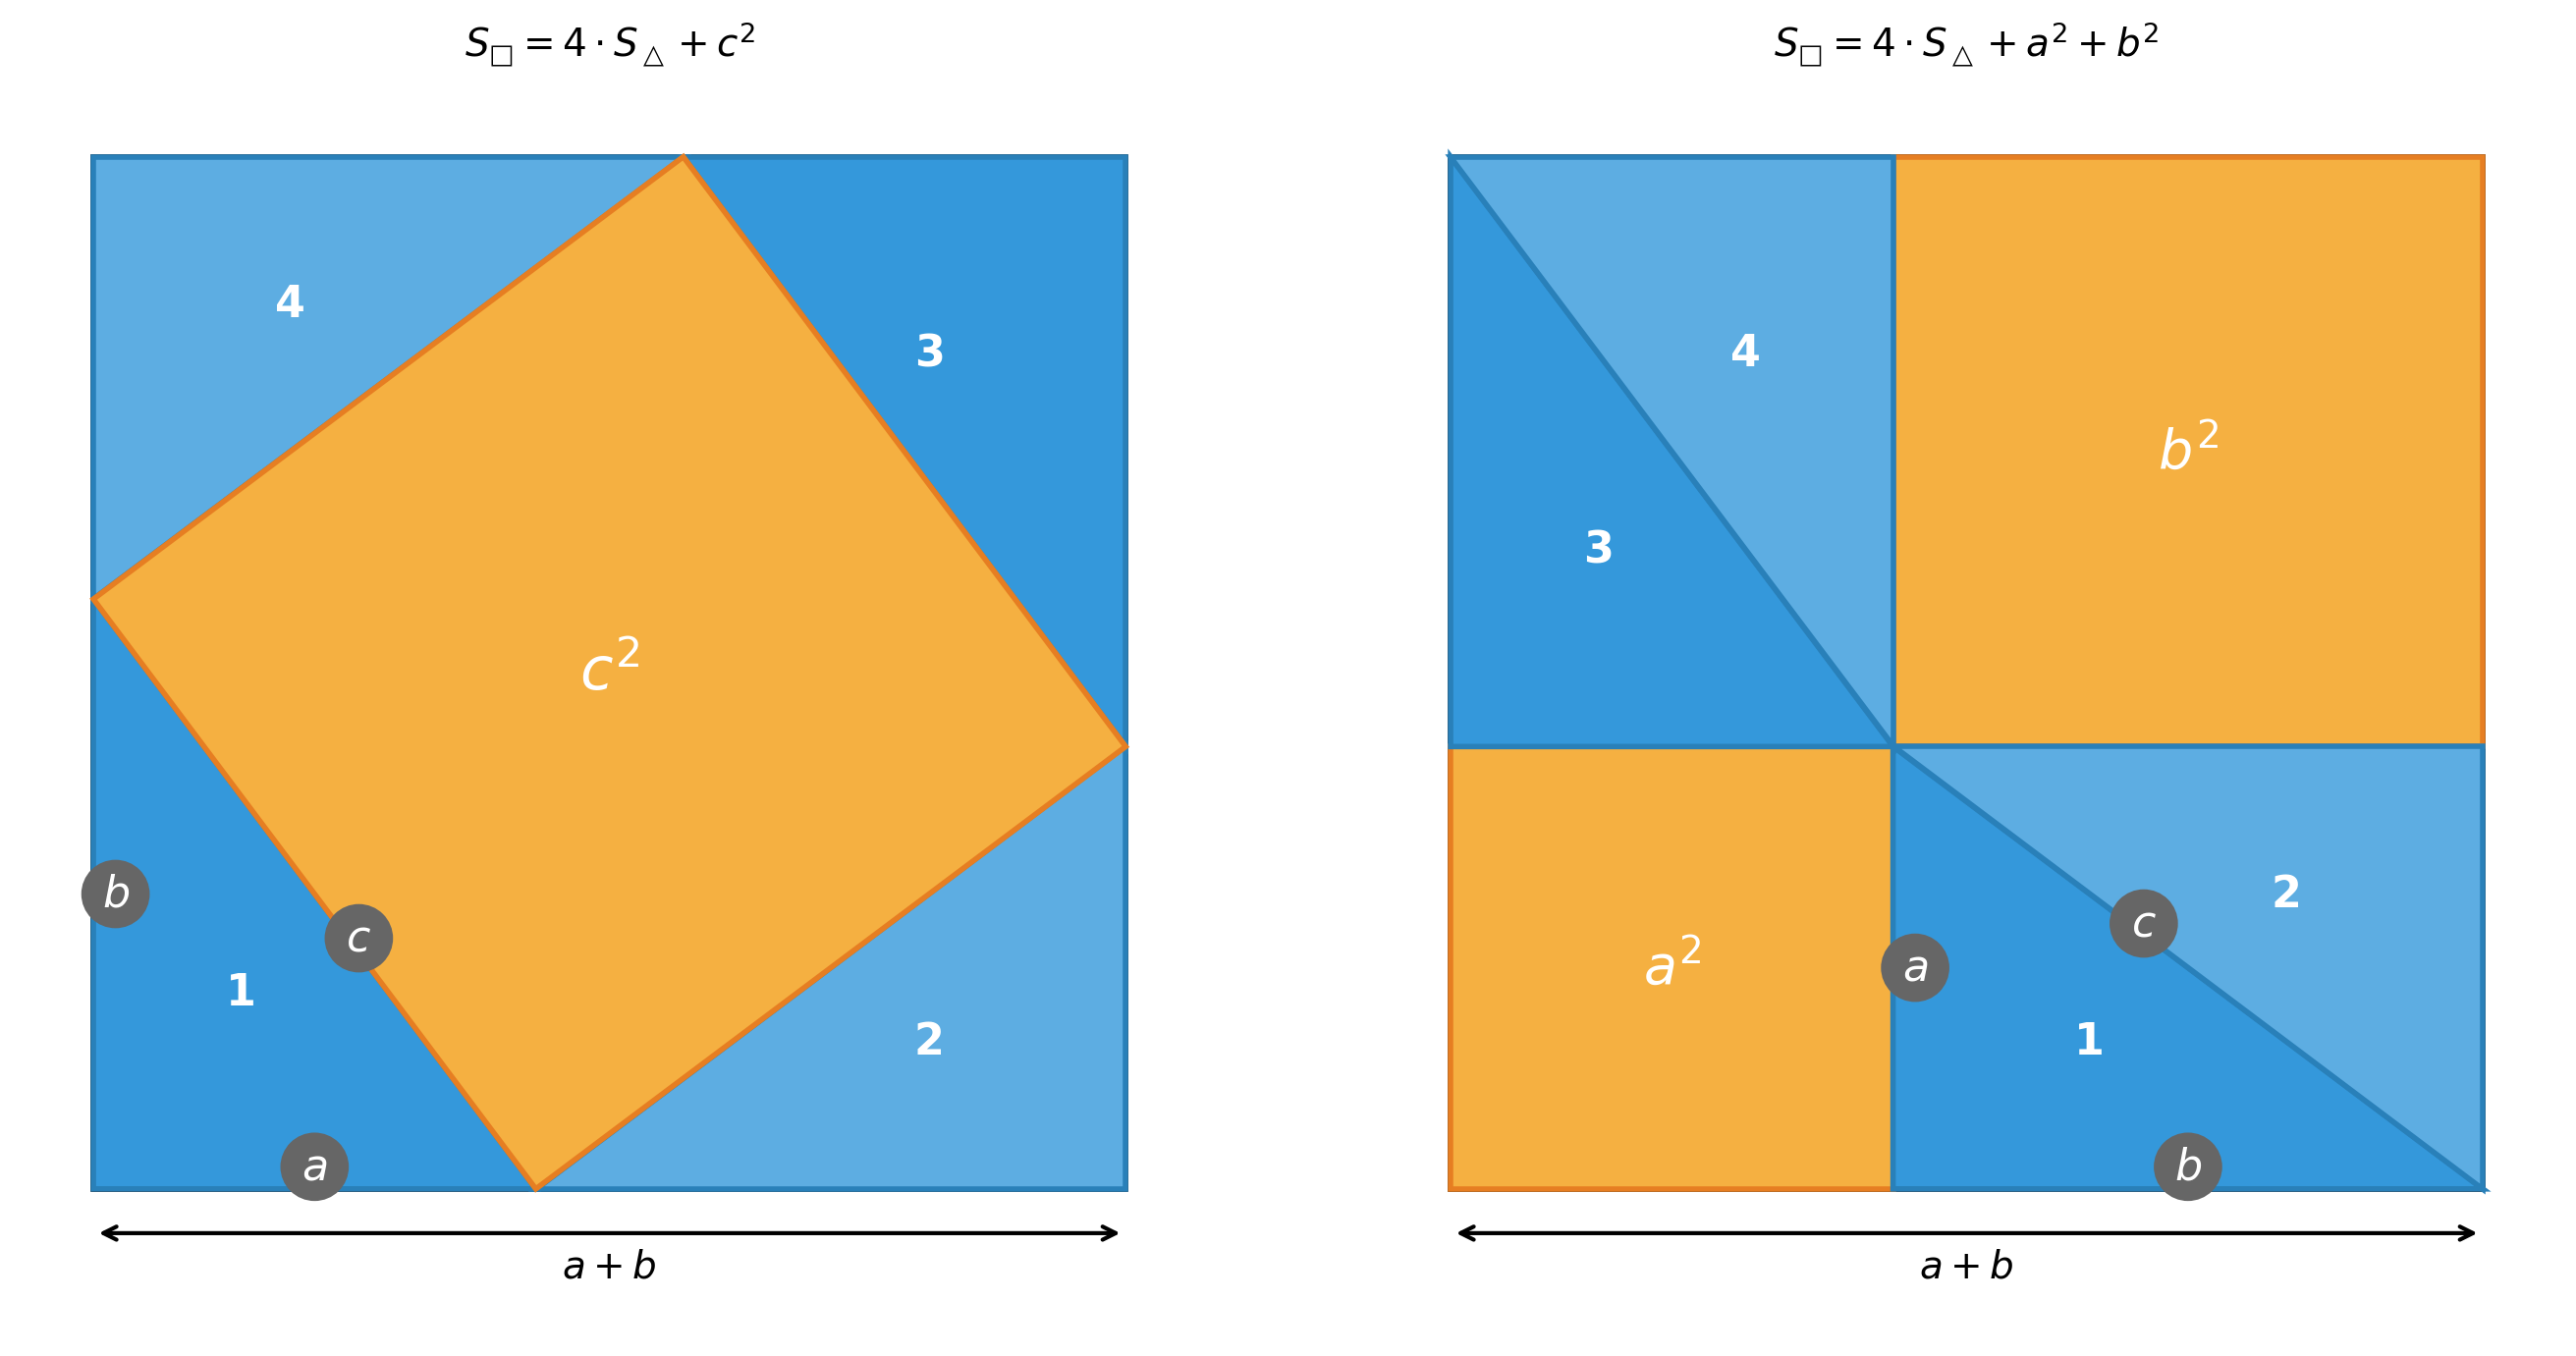

ДОКАЗАТЕЛЬСТВО:

Оба квадрата имеют одинаковую площадь: (a+b)² = (3+4)² = 49

На обеих картинках — одни и те же 4 треугольника!

Способ 1:  4△ + c²
Способ 2:  4△ + a² + b²

Треугольники одинаковые, значит:
       c²  =  a² + b²

       5²  =  3² + 4²
       25  =  9 + 16  ✓


In [65]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Rectangle
import numpy as np

# Настройка для Retina дисплея
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.usetex'] = False  # используем встроенный mathtext

a, b = 3, 4  # катеты
c = np.sqrt(a**2 + b**2)  # гипотенуза

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# ============ КАРТИНКА 1: c² в центре ============
ax = axes[0]

# Большой квадрат (a+b) × (a+b)
ax.add_patch(Rectangle((0, 0), a+b, a+b, fill=False, edgecolor='black', linewidth=2))

# 4 прямоугольных треугольника (синие, 2 и 4 светлее)
triangles = [
    Polygon([(0, 0), (a, 0), (0, b)], facecolor='#3498db', edgecolor='#2980b9', linewidth=2),      # 1 - тёмный
    Polygon([(a, 0), (a+b, 0), (a+b, a)], facecolor='#5dade2', edgecolor='#2980b9', linewidth=2),  # 2 - светлый
    Polygon([(a+b, a), (a+b, a+b), (b, a+b)], facecolor='#3498db', edgecolor='#2980b9', linewidth=2),  # 3 - тёмный
    Polygon([(b, a+b), (0, a+b), (0, b)], facecolor='#5dade2', edgecolor='#2980b9', linewidth=2),  # 4 - светлый
]
for tri in triangles:
    ax.add_patch(tri)

# Центральный квадрат c² (оранжевый)
center_sq = Polygon([(0, b), (a, 0), (a+b, a), (b, a+b)], 
                    facecolor='#f5b041', edgecolor='#e67e22', linewidth=2)
ax.add_patch(center_sq)

# Подписи (LaTeX)
ax.text((a+b)/2, (a+b)/2, r'$c^2$', fontsize=22, ha='center', va='center', fontweight='bold', color='white')
ax.text(a/3, b/3, '1', fontsize=16, ha='center', va='center', fontweight='bold', color='white')
ax.text(a + 2*b/3, a/3, '2', fontsize=16, ha='center', va='center', fontweight='bold', color='white')
ax.text(a + 2*b/3, a + 2*b/3, '3', fontsize=16, ha='center', va='center', fontweight='bold', color='white')
ax.text(b/3, b + 2*a/3, '4', fontsize=16, ha='center', va='center', fontweight='bold', color='white')

# Подписи сторон треугольника 1 (левый нижний) — белые в серых кружках
bbox_style = dict(boxstyle='circle,pad=0.3', facecolor='#666666', edgecolor='none')
ax.text(a/2, 0.15, r'$a$', fontsize=16, ha='center', va='center', color='white', fontweight='bold', bbox=bbox_style)
ax.text(0.15, b/2, r'$b$', fontsize=16, ha='center', va='center', color='white', fontweight='bold', bbox=bbox_style)
ax.text(a/2 + 0.3, b/2 - 0.3, r'$c$', fontsize=16, ha='center', va='center', color='white', fontweight='bold', bbox=bbox_style)

# Размеры
ax.annotate('', xy=(a+b, -0.3), xytext=(0, -0.3), 
            arrowprops=dict(arrowstyle='<->', color='black', lw=1.5))
ax.text((a+b)/2, -0.6, r'$a + b$', fontsize=14, ha='center')

ax.set_xlim(-0.5, a+b+0.5)
ax.set_ylim(-1, a+b+0.5)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title(r'$S_{□} = 4 \cdot S_\triangle + c^2$', fontsize=14, fontweight='bold', pad=10)

# ============ КАРТИНКА 2: a² + b² + 4 треугольника ============
ax = axes[1]

# Большой квадрат (a+b) × (a+b)
ax.add_patch(Rectangle((0, 0), a+b, a+b, fill=False, edgecolor='black', linewidth=2))

# Квадрат a² (оранжевый) — левый нижний
ax.add_patch(Rectangle((0, 0), a, a, facecolor='#f5b041', edgecolor='#e67e22', linewidth=2))
ax.text(a/2, a/2, r'$a^2$', fontsize=20, ha='center', va='center', fontweight='bold', color='white')

# Квадрат b² (оранжевый) — правый верхний  
ax.add_patch(Rectangle((a, a), b, b, facecolor='#f5b041', edgecolor='#e67e22', linewidth=2))
ax.text(a + b/2, a + b/2, r'$b^2$', fontsize=20, ha='center', va='center', fontweight='bold', color='white')

# Правый нижний прямоугольник — 2 треугольника с диагональю
ax.add_patch(Polygon([(a, 0), (a+b, 0), (a, a)], facecolor='#3498db', edgecolor='#2980b9', linewidth=2))
ax.add_patch(Polygon([(a+b, 0), (a+b, a), (a, a)], facecolor='#5dade2', edgecolor='#2980b9', linewidth=2))
ax.text(a + b/3, a/3, '1', fontsize=16, ha='center', va='center', fontweight='bold', color='white')
ax.text(a + 2*b/3, 2*a/3, '2', fontsize=16, ha='center', va='center', fontweight='bold', color='white')

# Подписи сторон треугольника 1 (правый нижний прямоугольник) — белые в серых кружках
bbox_style = dict(boxstyle='circle,pad=0.3', facecolor='#666666', edgecolor='none')
ax.text(a + b/2, 0.15, r'$b$', fontsize=16, ha='center', va='center', color='white', fontweight='bold', bbox=bbox_style)
ax.text(a + 0.15, a/2, r'$a$', fontsize=16, ha='center', va='center', color='white', fontweight='bold', bbox=bbox_style)
ax.text(a + b/2 - 0.3, a/2 + 0.3, r'$c$', fontsize=16, ha='center', va='center', color='white', fontweight='bold', bbox=bbox_style)

# Левый верхний прямоугольник — 2 треугольника с диагональю
ax.add_patch(Polygon([(0, a), (a, a), (0, a+b)], facecolor='#3498db', edgecolor='#2980b9', linewidth=2))
ax.add_patch(Polygon([(a, a), (a, a+b), (0, a+b)], facecolor='#5dade2', edgecolor='#2980b9', linewidth=2))
ax.text(a/3, a + b/3, '3', fontsize=16, ha='center', va='center', fontweight='bold', color='white')
ax.text(2*a/3, a + 2*b/3, '4', fontsize=16, ha='center', va='center', fontweight='bold', color='white')

# Размеры
ax.annotate('', xy=(a+b, -0.3), xytext=(0, -0.3), 
            arrowprops=dict(arrowstyle='<->', color='black', lw=1.5))
ax.text((a+b)/2, -0.6, r'$a + b$', fontsize=14, ha='center')

ax.set_xlim(-0.5, a+b+0.5)
ax.set_ylim(-1, a+b+0.5)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title(r'$S_{□} = 4 \cdot S_\triangle + a^2 + b^2$', fontsize=14, fontweight='bold', pad=10)

plt.tight_layout()
plt.show()

# Объяснение
print("=" * 60)
print("ДОКАЗАТЕЛЬСТВО:")
print("=" * 60)
print(f"\nОба квадрата имеют одинаковую площадь: (a+b)² = ({a}+{b})² = {(a+b)**2}")
print(f"\nНа обеих картинках — одни и те же 4 треугольника!")
print(f"\nСпособ 1:  4△ + c²")
print(f"Способ 2:  4△ + a² + b²")
print(f"\nТреугольники одинаковые, значит:")
print(f"       c²  =  a² + b²")
print(f"\n       {c:.0f}²  =  {a}² + {b}²")
print(f"       {int(c**2)}  =  {a**2} + {b**2}  ✓")
